# Multiple Regression

Shows how to calculate just the best fit, or - using "statsmodels" - all the
corresponding statistical parameters.

Also shows how to make 3d plots.

Author: Thomas Haslwanter, Date:   April-2020

In [5]:
# The standard imports
%pylab inline
import pandas as pd
# For the 3d plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For the statistic
from statsmodels.formula.api import ols

Populating the interactive namespace from numpy and matplotlib


## Generate and show the data

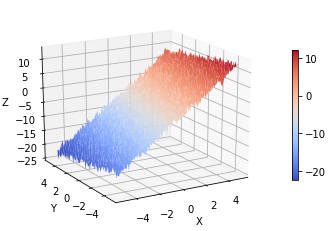

In [6]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)

## Simple plane fit

In [7]:
M = np.vstack((np.ones(len(X)), X, Y)).T
bestfit = np.linalg.lstsq(M,Z, rcond=None)[0]
print('Best fit plane:', bestfit)

Best fit plane: [[-0.02345356 -0.02292034 -0.02272582 ...  0.01093157  0.01126141
   0.01150601]
 [-0.00519251 -0.00503387 -0.00484759 ... -0.00465247 -0.00479241
  -0.00504966]
 [-0.00519251 -0.00503387 -0.00484759 ... -0.00465247 -0.00479241
  -0.00504966]
 ...
 [-0.1125771  -0.11001765 -0.10908396 ...  0.05247156  0.05405476
   0.05522884]
 [-0.11492246 -0.11230968 -0.11135654 ...  0.05356472  0.0551809
   0.05637944]
 [-0.11726782 -0.11460172 -0.11362912 ...  0.05465787  0.05630704
   0.05753004]]


## Multilinear regression model

In [8]:
# calculate fit, P-values, confidence intervals etc.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})

# Fit the model
model = ols("z ~ x + y", df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.148e+05
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:12:14   Log-Likelihood:                -14304.
No. Observations:               10201   AIC:                         2.861e+04
Df Residuals:                   10198   BIC:                         2.864e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9912      0.010   -512.529      0.0